### Import Libraries

In [3]:
#!pip install psycopg2

  Using cached https://files.pythonhosted.org/packages/23/7e/93c325482c328619870b6cd09370f6dbe1148283daca65115cd63642e60f/psycopg2-2.8.2.tar.gz
  Running setup.py bdist_wheel for psycopg2 ... done
  Stored in directory: /Users/flatironschool/Library/Caches/pip/wheels/3b/d0/9c/fbbaca1e768e108fdcb88a9a50ea43de141adf842741f8623f
Successfully built psycopg2


In [4]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.power import TTestIndPower

### Connect to PostgreSQL Database, Query Tables, & Create Pandas DataFrames from them

In [5]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Country
;'''

cur.execute(query)

In [6]:
countries_data = cur.fetchall()
countries_df = pd.DataFrame(countries_data)
countries_df.columns = [i[0] for i in cur.description]
countries_df.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [7]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM League
;'''

cur.execute(query)

league_data = cur.fetchall()
league_df = pd.DataFrame(league_data)
league_df.columns = [i[0] for i in cur.description]
league_df.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [8]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Match
;'''

cur.execute(query)

match_data = cur.fetchall()
match_df = pd.DataFrame(match_data)
match_df.columns = [i[0] for i in cur.description]

In [9]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Player_Attributes
;'''

cur.execute(query)

player_attrib_data = cur.fetchall()
player_attrib_df = pd.DataFrame(player_attrib_data)
player_attrib_df.columns = [i[0] for i in cur.description]
player_attrib_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [10]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Team
;'''

cur.execute(query)

team_data = cur.fetchall()
team_df = pd.DataFrame(team_data)
team_df.columns = [i[0] for i in cur.description]
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [11]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Team_Attributes
;'''

cur.execute(query)

team_attrib_data = cur.fetchall()
team_attrib_df = pd.DataFrame(team_attrib_data)
team_attrib_df.columns = [i[0] for i in cur.description]
team_attrib_df.head()

,id,team_fifa_api_id,team_api_id,date,buildupplayspeed,buildupplayspeedclass,buildupplaydribbling,buildupplaydribblingclass,buildupplaypassing,buildupplaypassingclass,...,chancecreationshooting,chancecreationshootingclass,chancecreationpositioningclass,defencepressure,defencepressureclass,defenceaggression,defenceaggressionclass,defenceteamwidth,defenceteamwidthclass,defencedefenderlineclass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [12]:
player_df = pd.read_csv('player.csv')
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


## HYPOTHESIS TEST 1:
##### Is there a statistical difference in the odds of winning a game when a team is playing in front of their home crowd?

- H0 (Null Hypothesis): mean_win_rate_home = mean_win_rate_away
    - there is no statistically significant difference in the odds of winning a game when a team is at playing at home vs. when a team is playing away 
- HA (Alternative Hypothesis): mean_win_rate_home != mean_win_rate_away
    - there is a statistically significant difference in the odds of winning a game when a team is playing at home vs. when a team is playing away 

- Alpha = 0.05

##### Assumptions for a 2-sample T-test:
- Data is collected randomly
- Data is independent
- Data is approximately normally distributed

In [13]:
#create new columns home_team_win & away_team win with binary values as such:
#Home team winning = 1, Tie=0, Away team winning = 0
match_df['home_team_win'] = np.zeros
match_df['away_team_win'] = np.zeros

In [14]:
#WIN
match_df['home_team_win'].loc[match_df['home_team_goal'] > match_df['away_team_goal']] = 1
#LOSS
match_df['home_team_win'].loc[match_df['home_team_goal'] < match_df['away_team_goal']] = 0
#TIE
match_df['home_team_win'].loc[match_df['home_team_goal'] == match_df['away_team_goal']] = 0

#WIN
match_df['away_team_win'].loc[match_df['home_team_goal'] < match_df['away_team_goal']] = 1
#LOSS
match_df['away_team_win'].loc[match_df['home_team_goal'] > match_df['away_team_goal']] = 0
#TIE
match_df['away_team_win'].loc[match_df['home_team_goal'] == match_df['away_team_goal']] = 0

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
#create numpy arrays
home_team_win_array = np.array(match_df['home_team_win'])
away_team_win_array = np.array(match_df['away_team_win'])

#the means of each array represent the win rate: win rate = matches won / matches NOT won (tie or loss)
x_bar_home = np.mean(home_team_win_array)
x_bar_away = np.mean(away_team_win_array)

#calculate the difference between the means, using all rows in the dataset
diff = x_bar_home - x_bar_away
diff

0.17133069017283187

In [16]:
len(home_team_win_array)

25979

In [17]:
len(away_team_win_array)

25979

#### Cohen's d: Effect Size

In [18]:
n_home = len(home_team_win_array)

n_away = len(away_team_win_array)

home_wins = sum(home_team_win_array)
away_wins = sum(away_team_win_array)

home_win_rate = home_wins/n_home
away_win_rate = away_wins/n_home

diff = home_win_rate-away_win_rate
print(f"Home Win Rate: {home_win_rate}")
print(f"Away Win Rate: {away_win_rate}")
print(f"Difference: {diff}")

Home Win Rate: 0.45871665576042187
Away Win Rate: 0.28738596558759
Difference: 0.17133069017283187


In [19]:
var_home = home_team_win_array.var()
var_away = away_team_win_array.var()

In [20]:
pooled_var = (n_home * var_home + n_away * var_away) / (n_home + n_away)
cohens_d = diff / np.sqrt(pooled_var)

In [21]:
cohens_d = (diff) / np.sqrt(pooled_var)
cohens_d

0.35996267005447524

#### Finding Ideal Sample Size given Effect Size, desired Power, and desired Alpha

In [22]:
# Initialize parameters
effect = cohens_d
alpha = 0.05
power = 0.95
# sample 2 / sample 1   
ratio = len(away_team_win_array) / len(home_team_win_array)
# Perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None,ratio=ratio, alpha=alpha)
print(f"The minimum sample size: {result}")
print(f"Number of matches played:{len(away_team_win_array)}")

The minimum sample size: 201.5427376165529
Number of matches played:25979


#### Using Bootstrapping to sample from the ~25K matches, specifying # of iterations & sample size of each iteration

In [23]:
sample_means_home = []
for _ in range(1000):
    sample_mean = np.random.choice(home_team_win_array,size=202).mean()
    sample_means_home.append(sample_mean)
len(sample_means_home)

sample_means_away = []
for _ in range(1000):
    sample_mean = np.random.choice(away_team_win_array,size=202).mean()
    sample_means_away.append(sample_mean)
len(sample_means_away)

1000

#### Results of bootstrapping yields 2 lists (home and away) of win rates, the length of which is indicative of the # of iterations in the previous for loop

In [24]:
sample_means_home

[0.46534653465346537,
 0.47029702970297027,
 0.4504950495049505,
 0.4504950495049505,
 0.47029702970297027,
 0.5198019801980198,
 0.39603960396039606,
 0.5198019801980198,
 0.43564356435643564,
 0.47029702970297027,
 0.48514851485148514,
 0.4900990099009901,
 0.4603960396039604,
 0.4504950495049505,
 0.4603960396039604,
 0.4603960396039604,
 0.42574257425742573,
 0.4405940594059406,
 0.41089108910891087,
 0.46534653465346537,
 0.4752475247524752,
 0.49504950495049505,
 0.40594059405940597,
 0.5148514851485149,
 0.504950495049505,
 0.4603960396039604,
 0.4405940594059406,
 0.4603960396039604,
 0.5099009900990099,
 0.49504950495049505,
 0.5297029702970297,
 0.4405940594059406,
 0.47029702970297027,
 0.46534653465346537,
 0.42574257425742573,
 0.47029702970297027,
 0.4306930693069307,
 0.4603960396039604,
 0.5198019801980198,
 0.48514851485148514,
 0.46534653465346537,
 0.3910891089108911,
 0.4603960396039604,
 0.49504950495049505,
 0.4900990099009901,
 0.5,
 0.48514851485148514,
 0.52475

### Defining functions to calculate individual sample variances, pooled sample variance, and our t-statistic in a 2-sample T-test

In [25]:
def calc_variance(sample):
    '''Computes the variance a list of values'''
    sample_mean = np.mean(sample)
    return sum([(i - sample_mean)**2 for i in sample])

def calc_sample_variance(sample1, sample2):
    '''Computes the pooled variance 2 lists of values, using the calc_variance function'''
    n_1, n_2 = len(sample1), len(sample2)
    var1, var2 = calc_variance(sample1), calc_variance(sample2)
    return (var1 + var2) / ((n_1 + n_2) - 2)

def calc_twosample_tstatistic(expr, ctrl):
    '''Computes the 2-sample T-stat of 2 lists of values, using the calc_sample_variance function'''
    expr_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    n_e, n_c = len(expr), len(ctrl)
    samp_var = calc_sample_variance(expr,ctrl)
    t = (expr_mean - ctrl_mean) / np.sqrt(samp_var * ((1/n_e)+(1/n_c)))
    return t

 - In this version of the t-test we are assuming equal variances in our experimental and control groups, which is a reasonable assumption

In [26]:
t_stat = calc_twosample_tstatistic(sample_means_home, sample_means_away)

t_stat

113.69933828006397

### Double-checking T-statistic & Calculating P-value with SciPy built-in T-test function

In [27]:
stats.ttest_ind(sample_means_home, sample_means_away)

Ttest_indResult(statistic=113.69933828006401, pvalue=0.0)

### Plotting distributions of sample_means_home (Blue) vs. sample_means_away (Orange)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


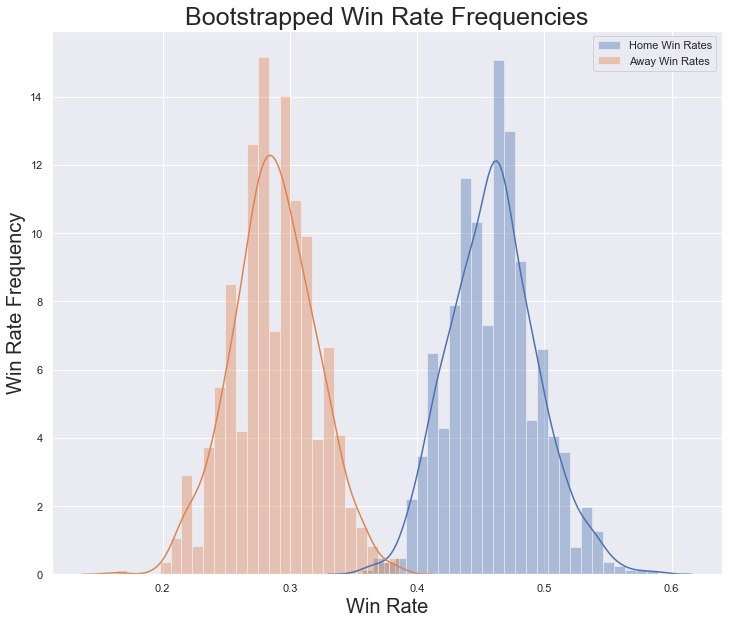

In [28]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
plt.title('Bootstrapped Win Rate Frequencies', fontsize='25')
plt.xlabel('Win Rate', fontsize='20')
plt.ylabel('Win Rate Frequency', fontsize='20')
sns.distplot(sample_means_home, label='Home Win Rates') # Blue distribution
sns.distplot(sample_means_away, label='Away Win Rates') # Orange distribution
plt.legend()
plt.show()

### Visualizing the T-statistic & negative T-statistic in a probability density function graph

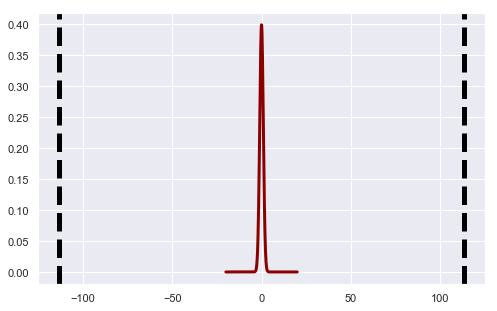

In [29]:
def visualize_t(t_stat, n_control, n_experimental):
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate points on the x axis between -20 and 20:
    xs = np.linspace(-20, 20, 500)

    # use stats.t.pdf to get values on the probability density function for the t-distribution
    ys= stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(t_stat, color='black', linestyle='--', lw=5)
    ax.axvline(-t_stat, color='black', linestyle='--', lw=5)
    plt.xlabel('t-stat', fontsize='20')
    plt.ylabel('probability density', fontsize='20')
    plt.title('Probability Density of t-test',fontsize='25')

    plt.show()
    return None

n_home = len(home_team_win_array)
n_away = len(away_team_win_array)
visualize_t(t_stat, n_home, n_away)

- Our P-values can be represented by the (very, very small - nearly 0) sum of areas under the curve on the outer sides of our t-statistic

In [30]:
## Calculate p_value manually
# Lower tail comulative density function returns area under the lower tail curve
df = len(sample_means_home)+len(sample_means_home)-2

tail = stats.t.cdf(-t_stat, df, 0, 1)

p_value = tail*2
print(p_value)

0.0


In [31]:
#DOUBLE CHECK WITH SCIPY
stats.t.sf(abs(t_stat), len(sample_means_home)+len(sample_means_away)-2)*2

0.0

In [32]:
#TRIPLE CHECK WITH SCIPY
stats.ttest_ind(sample_means_home, sample_means_away)

Ttest_indResult(statistic=113.69933828006401, pvalue=0.0)

## Conclusion:
- We reject the Null Hypothesis (H0) at our alpha level of 0.05, concluding that there is no statistically significant difference between the average win rate of home teams and the average win rate of away teams. 


### Visualizing Home-Field Advantage

In [33]:
result = pd.merge(match_df,
                  team_df[['team_long_name','team_api_id']],
                  left_on='home_team_api_id',
                  right_on='team_api_id',
                  how='left')
result.rename(columns={"team_long_name": "home_team_name"}, inplace=True)

result = result.drop(columns='team_api_id')

results = pd.merge(result,
                  team_df[['team_long_name','team_api_id']],
                  left_on='away_team_api_id',
                  right_on='team_api_id',
                  how='left')

results.rename(columns={"team_long_name": "away_team_name"}, inplace=True)

results = results.drop(columns='team_api_id')

In [34]:
results['winning_team'] = np.nan
results.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,gbd,gba,bsh,bsd,bsa,home_team_win,away_team_win,home_team_name,away_team_name,winning_team
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.25,4,1.73,3.4,4.2,0,0,KRC Genk,Beerschot AC,NaN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.75,1.91,3.25,3.6,0,0,SV Zulte-Waregem,Sporting Lokeren,NaN
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.2,2.5,2.3,3.2,2.75,0,1,KSV Cercle Brugge,RSC Anderlecht,NaN
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,5.5,1.44,3.75,6.5,1,0,KAA Gent,RAEC Mons,NaN
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.5,1.65,4.75,3.3,1.67,0,1,FCV Dender EH,Standard de Liège,NaN


In [35]:
results['winning_team'].loc[results['home_team_goal'] > results['away_team_goal']] = results['home_team_name']
results['winning_team'].loc[results['home_team_goal'] < results['away_team_goal']] = results['away_team_name']

In [36]:
results.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,gbd,gba,bsh,bsd,bsa,home_team_win,away_team_win,home_team_name,away_team_name,winning_team
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.25,4,1.73,3.4,4.2,0,0,KRC Genk,Beerschot AC,NaN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.75,1.91,3.25,3.6,0,0,SV Zulte-Waregem,Sporting Lokeren,NaN
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.2,2.5,2.3,3.2,2.75,0,1,KSV Cercle Brugge,RSC Anderlecht,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,5.5,1.44,3.75,6.5,1,0,KAA Gent,RAEC Mons,KAA Gent
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.5,1.65,4.75,3.3,1.67,0,1,FCV Dender EH,Standard de Liège,Standard de Liège


In [37]:
home_team_win_df = results.groupby("home_team_name").agg({
        "home_team_win": "mean",
    })

home_team_win_df.sort_values(by= 'home_team_win',ascending=False)

,home_team_win
home_team_name,
FC Barcelona,0.861842
Real Madrid CF,0.848684
SL Benfica,0.822581
FC Porto,0.822581
FC Bayern Munich,0.801471
Celtic,0.789474
PSV,0.772059
Manchester United,0.763158
Ajax,0.757353


In [38]:
away_team_win_df = results.groupby("away_team_name").agg({
        "away_team_win": "mean",
    })

away_team_win_df.sort_values(by= 'away_team_win',ascending=False)

,away_team_win
away_team_name,
Rangers,0.684211
FC Barcelona,0.677632
SL Benfica,0.669355
FC Porto,0.653226
Real Madrid CF,0.651316
Celtic,0.644737
FC Bayern Munich,0.617647
Ajax,0.573529
Juventus,0.560000


(0, 1)

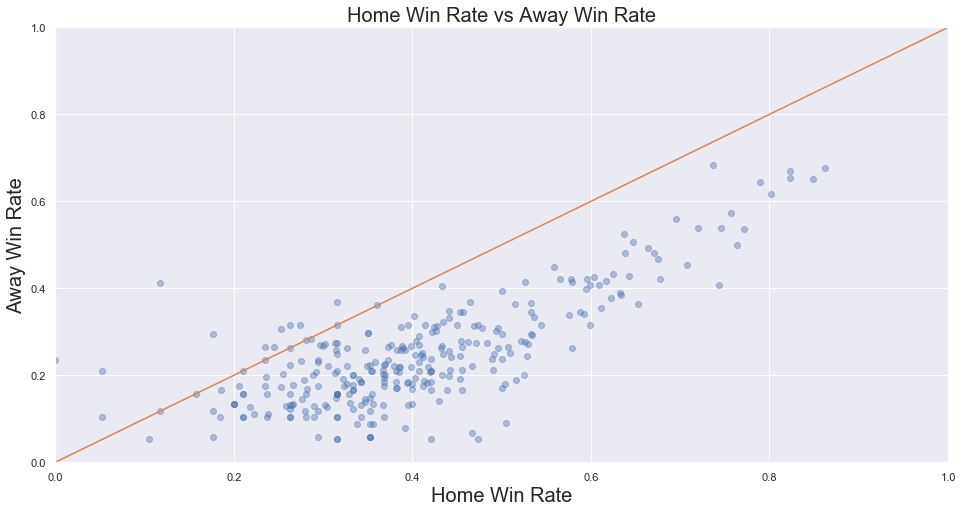

In [39]:
plt.figure(figsize=(16,8)) 
plt.plot(home_team_win_df,away_team_win_df,'o', alpha = 0.4)
plt.plot([0,1],[0,1])
plt.xlabel('Home Win Rate',fontsize='20')
plt.ylabel('Away Win Rate',fontsize='20')
plt.title('Home Win Rate vs Away Win Rate',fontsize='20')
plt.xlim([0,1])
plt.ylim([0,1])